Practica.

Basado en el proyecto de lavado de autos manual, se desea agregar el proceso de cambio de aceite, el mismo que tiene una duración en promedio de (distribución normal con variación de 10 minutos):

    Bus : 60 minutos
    Furgoneta: 40 minutos
    Autos: 20 minutos

Finalmente, al empresa a empezado emitir clientes VIP, estos clientes no deben esperar por lo que si esta un proceso de lavado o cambio de aceite activo este debe dejar de realizarlo y atender al cliente VIP y despues continuar con lo que estaba realizando.

Por otro lado ahora existen dos personas que realizan el trabajo, se desea generar el numero de vehiculos atendidos por tipo, el numero de clientes VIP atendidos en el trasncurso de un mes a traves de graficas.

In [1]:
import simpy
import random
import matplotlib.pyplot as plt

In [2]:
MAX_VEHICULOS = 57
NUM_PERSONAS = 2
TIEMPO_SIMULACION = 60
TIEMPO_LAVADO = 7 
tiempo1={}
vehiculos=["auto","bus","furgoneta"]
INTERVALO_LLEGADA=7

In [3]:
class Lavanderia(object):    
  def __init__(self, environment, num_personas, tiempo_lavado):        
    self.env=environment
    self.personas = simpy.Resource(environment, num_personas)
    self.tiempo_lavado = tiempo_lavado
      
  def lavar_vehiculo(self, vehiculo, id):
    auxT=0
    if(vehiculo=="bus"):
      auxT=random.randint(self.tiempo_lavado+8,self.tiempo_lavado+13)
      yield self.env.timeout(auxT)
    elif(vehiculo=="auto"):
      auxT=random.randint(self.tiempo_lavado,self.tiempo_lavado+3)
      yield self.env.timeout(auxT)
    elif(vehiculo=="forgoneta"):
      auxT=random.randint(self.tiempo_lavado+5,self.tiempo_lavado+8)
      yield self.env.timeout(auxT)
    print('Finalizado lavado de %d min => %s %d a la hora %.2f.' % (auxT,vehiculo, id, env.now))

  def traslado_vehiculo(self, vehiculo, id):
    auxT=0
    if(vehiculo=="bus"):
      auxT=4
      yield self.env.timeout(auxT)
    elif(vehiculo=="auto"):
      auxT=1
      yield self.env.timeout(auxT)
    elif(vehiculo=="forgoneta"):
      auxT=2
      yield self.env.timeout(auxT)
    print('Finalizado trasladado de %d min => %s %d a la hora %.2f.' % (auxT,vehiculo,id,env.now))

def llegada_vehiculo(env, nombre, id, lavanderia):
  print('Llega %s %s a las: %.2f.' % (nombre, id, env.now))
  with lavanderia.personas.request() as persona:        
      yield persona        
      print('Inicio traslado %s %s a la hora: %.2f.' % (nombre, id, env.now))        
      yield env.process(lavanderia.traslado_vehiculo(nombre,id))
      print('Entra a lavarse %s %s a la hora: %.2f.' % (nombre, id, env.now))
      yield env.process(lavanderia.lavar_vehiculo(nombre,id))        
      print('[%s %s] en salida a las: %.2f.' % (nombre, id, env.now))        
      k=env.now
  if k in tiempo1:
      tiempo1[k]=tiempo1[k]+1 
  else:
      tiempo1[k]=1 

def ejecutar_simulacion(env, num_personas, tiempo_lavado, intervalo):
  lavanderia=Lavanderia(env, num_personas, tiempo_lavado)    
  for i in range(5):
      env.process(llegada_vehiculo(env, 'auto',(i+1),lavanderia))
  while True:
      auxV=random.randint(0, 2)
      yield env.timeout(random.randint(intervalo-6, intervalo-5))
      i+=1        
      env.process(llegada_vehiculo(env, vehiculos[auxV],(i+1),lavanderia))

print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_PERSONAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


Lavanderia UPS
Llega auto 1 a las: 0.00.
Llega auto 2 a las: 0.00.
Llega auto 3 a las: 0.00.
Llega auto 4 a las: 0.00.
Llega auto 5 a las: 0.00.
Inicio traslado auto 1 a la hora: 0.00.
Inicio traslado auto 2 a la hora: 0.00.
Finalizado trasladado de 1 min => auto 1 a la hora 1.00.
Finalizado trasladado de 1 min => auto 2 a la hora 1.00.
Entra a lavarse auto 1 a la hora: 1.00.
Entra a lavarse auto 2 a la hora: 1.00.
Llega bus 6 a las: 2.00.
Llega auto 7 a las: 3.00.
Llega bus 8 a las: 5.00.
Llega furgoneta 9 a las: 6.00.
Llega auto 10 a las: 7.00.
Llega bus 11 a las: 8.00.
Finalizado lavado de 8 min => auto 1 a la hora 9.00.
Finalizado lavado de 8 min => auto 2 a la hora 9.00.
Llega bus 12 a las: 9.00.
[auto 1] en salida a las: 9.00.
[auto 2] en salida a las: 9.00.
Inicio traslado auto 3 a la hora: 9.00.
Inicio traslado auto 4 a la hora: 9.00.
Finalizado trasladado de 1 min => auto 3 a la hora 10.00.
Finalizado trasladado de 1 min => auto 4 a la hora 10.00.
Entra a lavarse auto 3 a la h

In [4]:
MAX_VEHICULOS = 57
NUM_MAQUINAS = 4
TIEMPO_SIMULACION = 60
TIEMPO_LAVADO = 7 
tiempo2={}
vehiculos=["auto","bus","furgoneta"]
INTERVALO_LLEGADA=7
print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_PERSONAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))
def llegada_vehiculo(env, nombre, id, lavanderia):
  print('Llega %s %s a las: %.2f.' % (nombre, id, env.now))
  with lavanderia.personas.request() as persona:         
      yield persona        
      print('Inicio traslado %s %s a la hora: %.2f.' % (nombre, id, env.now))        
      yield env.process(lavanderia.traslado_vehiculo(nombre,id))
      print('Entra a lavarse %s %s a la hora: %.2f.' % (nombre, id, env.now))
      yield env.process(lavanderia.lavar_vehiculo(nombre,id))        
      print('[%s %s] en salida a las: %.2f.' % (nombre, id, env.now))        
      k=env.now
  if k in tiempo2:
      tiempo2[k]=tiempo2[k]+1 
  else:
      tiempo2[k]=1 
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

Lavanderia UPS
Llega auto 1 a las: 0.00.
Llega auto 2 a las: 0.00.
Llega auto 3 a las: 0.00.
Llega auto 4 a las: 0.00.
Llega auto 5 a las: 0.00.
Inicio traslado auto 1 a la hora: 0.00.
Inicio traslado auto 2 a la hora: 0.00.
Finalizado trasladado de 1 min => auto 1 a la hora 1.00.
Finalizado trasladado de 1 min => auto 2 a la hora 1.00.
Entra a lavarse auto 1 a la hora: 1.00.
Entra a lavarse auto 2 a la hora: 1.00.
Llega bus 6 a las: 2.00.
Llega auto 7 a las: 3.00.
Llega bus 8 a las: 5.00.
Llega furgoneta 9 a las: 6.00.
Llega auto 10 a las: 7.00.
Llega bus 11 a las: 8.00.
Finalizado lavado de 8 min => auto 1 a la hora 9.00.
Finalizado lavado de 8 min => auto 2 a la hora 9.00.
Llega bus 12 a las: 9.00.
[auto 1] en salida a las: 9.00.
[auto 2] en salida a las: 9.00.
Inicio traslado auto 3 a la hora: 9.00.
Inicio traslado auto 4 a la hora: 9.00.
Finalizado trasladado de 1 min => auto 3 a la hora 10.00.
Finalizado trasladado de 1 min => auto 4 a la hora 10.00.
Entra a lavarse auto 3 a la h

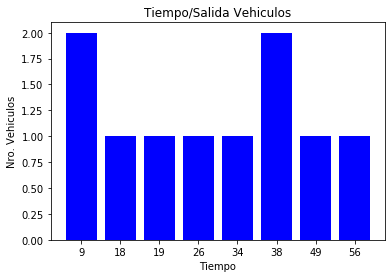

In [6]:

etiqueta = list(tiempo2.keys())
valores = list(tiempo2.values())
plt.bar(range(len(tiempo2)), valores, align="center", tick_label=etiqueta)

etiqueta = list(tiempo1.keys())
valores = list(tiempo1.values())
plt.bar(range(len(tiempo1)), valores, align="center", tick_label=etiqueta, color='blue')

plt.title("Tiempo/Salida Vehiculos")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()